In [367]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

### load and prepare data

In [595]:
digits = load_digits()
print(np.unique(digits.target))
data = digits.data
print(np.unique(data))
target = digits.target.reshape(data.shape[0], 1)
print(f'Before Transpose: X: {data.shape}, y: {target.shape}')

# scale the feature value(digits.data) between 0 to 1 instead of 0 to 16
data = data / 16

"""
Dimension of input(X) and y(output) should be as follows:
X:= (features, samples). i.e. if input has 1000 samples with 64 features in each sample,
X should be arranged in (64, 1000) matrix. If input is provided in (1000, 64), 
then transpose it.

Y:= (1, samples). Similar to X, each output should be stacked column-wise.
"""
X = data.T
target = target.T

print(f'After Transpose: X: {X.shape}, y: {target.shape}')

m = Y.shape[1]
Y = np.zeros((10, m))
for i in range(m):
    Y[target[0, i], i] = 1
    
# print(Y[:, 0:5])
# print(Y_train[:, 0:5])


[0 1 2 3 4 5 6 7 8 9]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]
Before Transpose: X: (1797, 64), y: (1797, 1)
After Transpose: X: (64, 1797), y: (1, 1797)


In [596]:
a = np.array([4, 1, 0, 0, 4, 3, 5])
aa = np.zeros((10, len(a)))
for i in range(len(a)):
    aa[a[i], i] = 1

### analyze data

In [597]:
"""
This method takes parameter values from 0 to 1796
"""
def print_details(sample_id):
    x = X[:, sample_id].reshape(8, 8)
    y = Y[:, sample_id]
    print(f'X: {x},\n y: {y}')
    plt.gray()
    plt.matshow(x)
    plt.show()

X: [[0.     0.     0.3125 0.8125 0.5625 0.0625 0.     0.    ]
 [0.     0.     0.8125 0.9375 0.625  0.9375 0.3125 0.    ]
 [0.     0.1875 0.9375 0.125  0.     0.6875 0.5    0.    ]
 [0.     0.25   0.75   0.     0.     0.5    0.5    0.    ]
 [0.     0.3125 0.5    0.     0.     0.5625 0.5    0.    ]
 [0.     0.25   0.6875 0.     0.0625 0.75   0.4375 0.    ]
 [0.     0.125  0.875  0.3125 0.625  0.75   0.     0.    ]
 [0.     0.     0.375  0.8125 0.625  0.     0.     0.    ]],
 y: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


<Figure size 432x288 with 0 Axes>

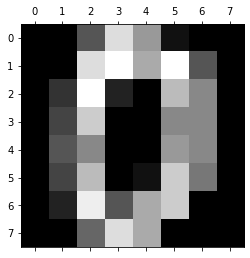

In [598]:
# print details of any sample out of 1797 samples
print_details(0)

### activation functions

In [599]:
"""The following activation functions are used in forward propagation."""
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def relu(Z):
    return np.maximum(0, Z)

def softmax(Z):
    return np.exp(Z)/sum(np.exp(Z))

"""The following derivatives for activation functions are used back propagation."""
def sigmoid_back(dA, Z):
    S = sigmoid(Z)
    dS = S * (1 - S)
    dZ = dA * dS     # chain rule
    return dZ

def relu_back(dA, Z):
    dZ = np.array(dA, copy=True)
    dZ[Z <= 0] = 0
    return dZ

def softmax_back(dA, Z):
    # need to implement
    return None

### initialize weights and bias

In [600]:
"""
This method takes a list of numbers. The format of the list is as follows:
[n_x, n_h1, n_h2, ..., n_o]
where 
n_x = number of features in the input
n_h1, n_h2, ... = number of nodes in first, second, etc. hidden layers
n_o = number of output nodes.

For example:
If layers = [4, 6, 3, 1], then it has:
number of features in the input = 4
number of nodes in the first hidden layer = 6
number of nodes in the second hidden layer = 3
number of nodes in the output layer = 1
"""
def initialize_parameters(layers):
    L = len(layers)
    W = []
    b = []

    for l in range(0, L - 1):
        w_l = np.random.randn(layers[l + 1], layers[l]) * 0.01
        b_l = np.zeros((layers[l + 1], 1))
        W.append(w_l)
        b.append(b_l) 

    return W, b

In [601]:
layers = [64, 12, 8, 10]
W, b = initialize_parameters(layers)

for l in range(len(layers) - 1):
    print(f'layer {l}: W: {W[l].shape}, b: {b[l].shape}')

layer 0: W: (12, 64), b: (12, 1)
layer 1: W: (8, 12), b: (8, 1)
layer 2: W: (10, 8), b: (10, 1)


### forward propagation

In [602]:
def forward_prop(layers, W, X, b):
    """
    We use a cache to store necessary intermediate metrics for each layers.
    In this cache, for each layer, we store the corresponding input (AL - 1), weight(WL),
    bias(bL) and linear_forward(zL).
    
    We store this intermediate metrics, because we will need these for evaulating derivates
    during back-propagation.
    """
    caches = []
    for l in range(layers):
        if l == 0:
            input = X
        else:
            input = a
        z = np.dot(W[l], input) + b[l]
        if l < layers - 1:
            a = relu(z)
        else:
            a = sigmoid(z)
        """
        Here we are creating a cache for the current layer
        and appending to the caches.
        """
        cache = (input, W[l], b[l], z)
        caches.append(cache)
    return a, caches

In [603]:
AL, caches = forward_prop(3, W, X, b)
print(f'Output: {AL.shape}, cache length: {len(caches)}')
print('==================')
for layer in range(3):
    il, wl, bl, zl = caches[layer]
    print(f'layer {layer}: input: {il.shape}, w: {wl.shape}, b: {bl.shape}, z: {zl.shape}')

Output: (10, 1797), cache length: 3
layer 0: input: (64, 1797), w: (12, 64), b: (12, 1), z: (12, 1797)
layer 1: input: (12, 1797), w: (8, 12), b: (8, 1), z: (8, 1797)
layer 2: input: (8, 1797), w: (10, 8), b: (10, 1), z: (10, 1797)


### cost function

In [625]:
def compute_cost(AL, Y):
    m = AL.shape[1]
#     return (-1 / m) * (np.dot(Y, np.log(AL.T)) + (np.dot(1 - Y, np.log(1 - AL.T))))
    cost = -(1 / m) * np.sum((Y * np.log(AL) + (1 - Y) * np.log(1 - AL)))
    cost=np.squeeze(cost)
    assert(cost.shape == ())
    return cost

In [626]:
cost = compute_cost(AL, Y)
cost

6.931452734431898

### back propagation

In [627]:
def linear_back(A_prev, W, b, dZ):
    m = A_prev.shape[1]
    
    dW = (1 / m) * np.dot(dZ, A_prev.T)
    db = (1 / m) * np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T, dZ)
    
    return dA_prev, dW, db

In [628]:
def back_prop(AL, Y, caches):
    L = len(caches)  # number of layers
    m = AL.shape[1]
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    grads = []

    for l in reversed(range(L)):
        A_prev, W, b, Z = caches[l]
        if l == L-1:
            dZ = sigmoid_back(dAL, Z)
        else:
            dZ = relu_back(dA_prev, Z)

        dA_prev, dW, db = linear_back(A_prev, W, b, dZ)
        grad = (dA_prev, dW, db)
        """
        Because we are moving backward, we would need to store the gradient descent (GD)
        for each layers properly. That is, even if we moving from L->L-1->...->1,
        the grads (list containing GDs) in 1->...->L-1->L order.
        (This approach will help us, while updating the weight(W) and bias(b) parameters
        for next iteration.)
        
        Therefore, instead of append, I have used insert(0, grad) below.
        """
        #grads.append(grad)
        grads.insert(0, grad)
    return grads

In [629]:
grads = back_prop(AL, Y, caches)
L = len(grads)
for l in range(L):
    dA_prev, dW, db = grads[l]
    print(f'layer {l}: dA_prev: {dA_prev.shape}, dW: {dW.shape}, db: {db.shape}')

layer 0: dA_prev: (64, 1797), dW: (12, 64), db: (12, 1)
layer 1: dA_prev: (12, 1797), dW: (8, 12), db: (8, 1)
layer 2: dA_prev: (8, 1797), dW: (10, 8), db: (10, 1)


### update parameters

In [630]:
def update_parameters(W, b, grads, learning_rate):
    L = len(grads)
    for l in range(L):
        dA_prev, dW, db = grads[l]
        W[l] = W[l] - learning_rate * dW
        b[l] = b[l] - learning_rate * db
    return W, b

In [631]:
W, b = update_parameters(W, b, grads, 0.1)
for l in range(len(grads)):
    print(f'W: {W[l].shape}, b: {b[l].shape}')

W: (12, 64), b: (12, 1)
W: (8, 12), b: (8, 1)
W: (10, 8), b: (10, 1)


### bringing everything together

In [632]:
def L_layer_model(X, Y, layers, learning_rate = 0.0075, num_iterations = 3000):
    costs = []
    L = len(layers) - 1
    W, b = initialize_parameters(layers)
    
    for i in range(num_iterations):
        # forward propagation
        AL, caches = forward_prop(L, W, X, b)
        # compute cost
        cost = compute_cost(AL, Y)
        # backward propagation
        grads = back_prop(AL, Y, caches)
        # update parameters
        W, b = update_parameters(W, b, grads, learning_rate)
        
        if i % 100 == 0:
            print(f'Cost after iteration {i}: {cost}')
            costs.append(cost)
        
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title('Learning Rate: ' + str(learning_rate))
    plt.show()
    
    return W, b

Cost after iteration 0: 6.931439929590017
Cost after iteration 100: 5.928413240001373
Cost after iteration 200: 5.23231420623854
Cost after iteration 300: 4.738475690011022
Cost after iteration 400: 4.375807623090337
Cost after iteration 500: 4.0961883607436675
Cost after iteration 600: 3.8664623469134805
Cost after iteration 700: 3.6613572173219957
Cost after iteration 800: 3.4625147573016
Cost after iteration 900: 3.308378890011668
Cost after iteration 1000: 3.2584454654524286
Cost after iteration 1100: 3.252330938903357
Cost after iteration 1200: 3.2518409478769095
Cost after iteration 1300: 3.251778747135737
Cost after iteration 1400: 3.251747765680241
Cost after iteration 1500: 3.251720314526607
Cost after iteration 1600: 3.2516936265091094
Cost after iteration 1700: 3.2516670768839737
Cost after iteration 1800: 3.2516404203388958
Cost after iteration 1900: 3.2516135329128715
Cost after iteration 2000: 3.251586336258854
Cost after iteration 2100: 3.2515587689629464
Cost after iter

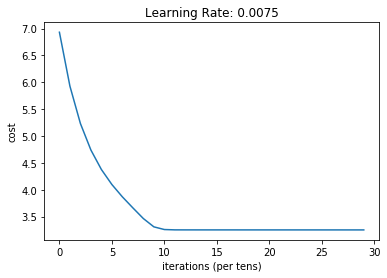

In [633]:
layers = [64, 12, 8, 10]
W, b = L_layer_model(X, Y, layers)